<center>
    <a href="https://www.aus.edu/"><img src="https://i.imgur.com/pdZvnSD.png" width=200> </a>
</center>

<h1 align=center><font size = 5>Anomaly Detection</font>
<h1 align=center><font size = 5>Prepared by Alex Aklson, Ph.D.</font>
<h1 align=center><font size = 5>November 7, 2024</font>

Import libraries and packages.

In [3]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [4]:
import matplotlib.pyplot as plt

Read Aircraft Engine Data and build an anomaly detection algorithm.

In [5]:
aircraft=pd.read_csv('datasets/aircraft_engine.csv')

In [6]:
aircraft.head()

,heat_generated,vibration_intensity,label
0,10.993428,24.198066,0.0
1,9.723471,22.773901,0.0
2,11.295377,20.178891,0.0
3,13.046060,18.059190,0.0
4,9.531693,22.094670,0.0


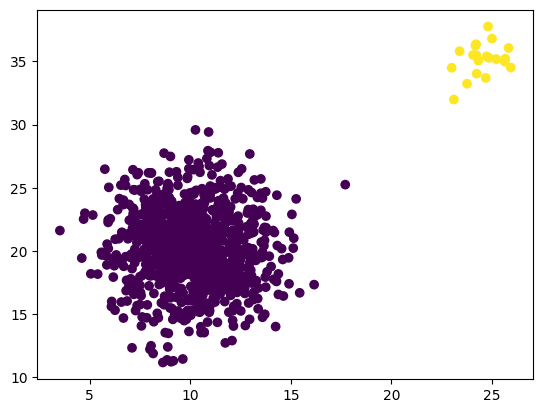

In [7]:
plt.scatter(aircraft['heat_generated'],aircraft['vibration_intensity'],c=aircraft['label'])

In [8]:
normal_data=aircraft[aircraft['label']==0]
anomaly_data=aircraft[aircraft['label']==1]

In [9]:

train_normal,valid_test_normal=train_test_split(normal_data,test_size=0.4, random_state=42)
val_normal,test_normal=train_test_split(valid_test_normal,test_size=0.5 , random_state=42)
val_anomaly,test_anomaly=train_test_split(anomaly_data,test_size=0.5,random_state=42)
val_data=pd.concat([val_normal,val_anomaly],ignore_index=True)
test_data=pd.concat([test_normal,test_anomaly],ignore_index=True)
train_data=train_normal

In [10]:
train_data['label'].unique()

array([0.])

In [11]:
train_heat_mean=train_data['heat_generated'].mean()
train_heat_std=train_data['heat_generated'].std()
train_vib_mean=train_data['vibration_intensity'].mean()
train_vib_std=train_data['vibration_intensity'].std()

In [12]:
val_data['prob_heat']=norm.pdf(val_data['heat_generated'],train_heat_mean,train_heat_std)
val_data['prob_vibration']=norm.pdf(val_data['vibration_intensity'],train_vib_mean,train_vib_std)

In [13]:
val_data

,heat_generated,vibration_intensity,label,prob_heat,prob_vibration
0,6.744915,25.653759,0.0,4.980696e-02,2.657293e-02
1,9.134884,17.590463,0.0,1.837781e-01,9.020151e-02
2,9.583755,21.165736,0.0,1.988021e-01,1.251663e-01
3,12.614286,24.127120,0.0,8.511800e-02,5.751448e-02
4,11.704867,24.885190,0.0,1.412919e-01,4.045506e-02
...,...,...,...,...,...
205,24.230858,35.476358,1.0,7.166383e-13,4.398648e-07
206,24.182911,36.238946,1.0,8.560697e-13,1.208271e-07
207,23.392440,35.807123,1.0,1.471594e-11,2.530961e-07
208,25.829475,36.060210,1.0,1.353711e-15,1.644918e-07


In [14]:
val_data['overall_prob']=val_data['prob_heat']*val_data['prob_vibration']


In [15]:
val_data

,heat_generated,vibration_intensity,label,prob_heat,prob_vibration,overall_prob
0,6.744915,25.653759,0.0,4.980696e-02,2.657293e-02,1.323517e-03
1,9.134884,17.590463,0.0,1.837781e-01,9.020151e-02,1.657706e-02
2,9.583755,21.165736,0.0,1.988021e-01,1.251663e-01,2.488331e-02
3,12.614286,24.127120,0.0,8.511800e-02,5.751448e-02,4.895518e-03
4,11.704867,24.885190,0.0,1.412919e-01,4.045506e-02,5.715975e-03
...,...,...,...,...,...,...
205,24.230858,35.476358,1.0,7.166383e-13,4.398648e-07,3.152240e-19
206,24.182911,36.238946,1.0,8.560697e-13,1.208271e-07,1.034364e-19
207,23.392440,35.807123,1.0,1.471594e-11,2.530961e-07,3.724547e-18
208,25.829475,36.060210,1.0,1.353711e-15,1.644918e-07,2.226745e-22


In [16]:
sorted_val_data=val_data.sort_values('overall_prob',ascending=False).reset_index(drop=True)

In [17]:
sorted_val_data

,heat_generated,vibration_intensity,label,prob_heat,prob_vibration,overall_prob
0,10.111450,20.203567,0.0,2.038336e-01,1.313314e-01,2.676975e-02
1,10.059512,20.063935,0.0,2.039909e-01,1.311530e-01,2.675401e-02
2,9.880949,20.228016,0.0,2.034345e-01,1.313341e-01,2.671788e-02
3,10.116417,20.671742,0.0,2.038111e-01,1.299125e-01,2.647760e-02
4,10.194155,19.785196,0.0,2.032873e-01,1.299737e-01,2.642201e-02
...,...,...,...,...,...,...
205,24.182911,36.238946,1.0,8.560697e-13,1.208271e-07,1.034364e-19
206,24.207580,36.360659,1.0,7.812987e-13,9.773919e-08,7.636350e-20
207,25.937570,34.508364,1.0,8.647152e-16,2.071092e-06,1.790905e-21
208,25.001205,36.800511,1.0,3.793078e-14,4.481611e-08,1.699910e-21


In [18]:
first_anomaly_index=sorted_val_data[sorted_val_data['label']==1].index[0]
first_anomaly_prob=sorted_val_data.loc[first_anomaly_index,'overall_prob']

In [19]:
margin=0.01*(sorted_val_data['overall_prob'].max()-sorted_val_data['overall_prob'].min())
threshold=first_anomaly_prob+margin

In [20]:
test_data['prob_heat']=norm.pdf(test_data['heat_generated'],train_heat_mean,train_heat_std)
test_data['prob_vibration']=norm.pdf(test_data['vibration_intensity'],train_vib_mean,train_vib_std)
test_data['overall_prob']=test_data['prob_heat']*test_data['prob_vibration']

In [21]:
test_data

,heat_generated,vibration_intensity,label,prob_heat,prob_vibration,overall_prob
0,9.108995,20.505964,0.0,1.826533e-01,1.307679e-01,2.388518e-02
1,8.300311,18.898916,0.0,1.380430e-01,1.194218e-01,1.648534e-02
2,7.234401,21.777581,0.0,7.349292e-02,1.152245e-01,8.468182e-03
3,12.712480,16.640990,0.0,7.954955e-02,6.551294e-02,5.211525e-03
4,9.029273,17.493959,0.0,1.790354e-01,8.770706e-02,1.570267e-02
...,...,...,...,...,...,...
205,25.213294,35.183850,1.0,1.643510e-14,7.100680e-07,1.167004e-20
206,24.237275,34.026454,1.0,6.997547e-13,4.312660e-06,3.017804e-18
207,24.692038,33.691180,1.0,1.256942e-13,7.078088e-06,8.896744e-19
208,25.635418,34.974426,1.0,3.003619e-15,9.947908e-07,2.987972e-21


In [22]:
test_data['pred_label']=(test_data['overall_prob']<threshold).astype(int)

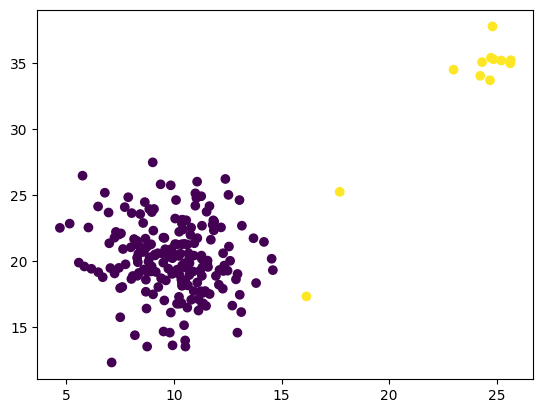

In [23]:
plt.scatter(test_data['heat_generated'],test_data['vibration_intensity'],c=test_data['pred_label'])
plt.show()

In [24]:
precision=precision_score(test_data['label'],test_data['pred_label'])
precision

np.float64(0.8333333333333334)

In [25]:
recall=recall_score(test_data['label'],test_data['pred_label'])
recall

np.float64(1.0)

In [26]:
f1=f1_score(test_data['label'],test_data['pred_label'])

In [27]:
tn,fp,fn,tp=confusion_matrix(test_data['label'],test_data['pred_label']).ravel()

In [28]:
recall=(tp)/(tp+fn)
recall

np.float64(1.0)